***Preliminary data analysis***

In [1]:
import sys
sys.path.append('../Data_Feature')
sys.path.append('../Data_processing')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from data_processing import KOProcessor
import seaborn
from plotly import graph_objects as go
import nbformat
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.feature_selection import VarianceThreshold

In [2]:
# Initialize processor with dataset paths  
processor = KOProcessor(  
    terms_zip_path = 'C:/Users/eliah/Documents/Master/Eliah-Masters/Datasets/terms_KO.zip',
    terms_csv_path = 'terms_KO.csv',
    traits_reduced_zip_path = 'C:/Users/eliah/Documents/Master/Eliah-Masters/Datasets/reducedDataset.zip',
    traits_reduced_csv_path = 'reducedDataset.csv',
    traits_assembled_zip_path = 'C:/Users/eliah/Documents/Master/Eliah-Masters/Datasets/assembledDataset.zip',
    traits_assembled_csv_path = 'assembledDataset.csv' 
)  

# Load datasets from ZIP  
ko_terms = processor.load_terms()  # KO annotations  
reduced_traits = processor.load_reduced_traits_data()  # Primary traits  
assembled_traits = processor.load_assembled_traits_data()  # Supplemental traits  

# Display raw data structure  
print("KO Terms Columns:", ko_terms.columns.tolist())  
print("Reduced Traits Columns:", reduced_traits.columns.tolist())
print("Assembled Traits Columns:", assembled_traits.columns.tolist())
print("KO Terms Shape:", ko_terms.shape)
print("Reduced Traits Shape:", reduced_traits.shape)
print("Assembled Traits Shape:", assembled_traits.shape)


Data loaded successfully:
   Unnamed: 0   key      KO
0           0  1000  K00001
1           1  1000  K13954
2           2  1000  K00003
3           3  1000  K00013
4           4  1000  K00014
Data loaded successfully:
   key        ID                      speciesStrain  \
0    1  592010.0   Abiotrophia defectiva ATCC 49176   
1    1     219.0     Abiotrophia defectiva DSM 9849   
2    2  159837.0       Abyssibacter profundi OUC007   
3    3       NaN  Acanthopleuribacter pedis FYK2218   
4    4  258515.0   Acetanaerobacterium elongatum Z7   

                 speciesStrainComp                genus            genusComp  \
0    abiotrophiadefectivaatcc49176          Abiotrophia          abiotrophia   
1      abiotrophiadefectivadsm9849          Abiotrophia          abiotrophia   
2       abyssibacterprofundiouc007         Abyssibacter         abyssibacter   
3  acanthopleuribacterpedisfyk2218  Acanthopleuribacter  acanthopleuribacter   
4   acetanaerobacteriumelongatumz7  Acetanaerobac

C:\Users\eliah\AppData\Local\Temp\ipykernel_14820\1317067288.py:16: UserWarning: Glyph 129 (\x81) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\eliah\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129 (\x81) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


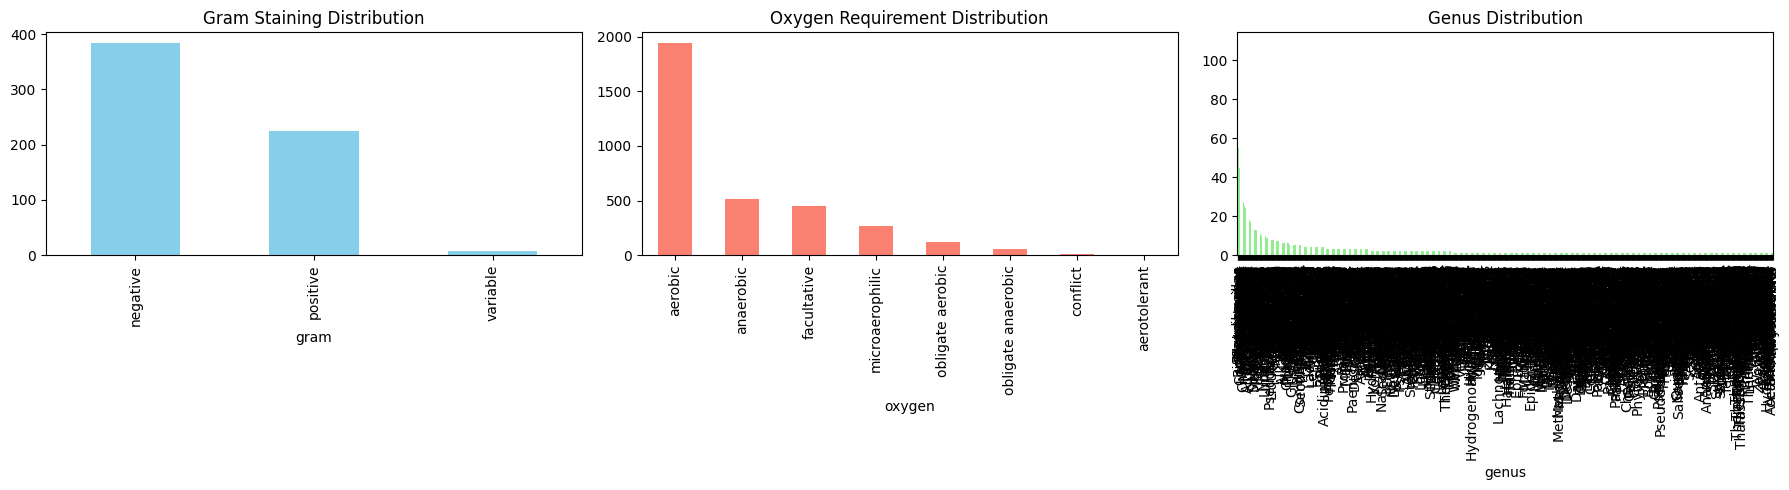

In [3]:
# Plot distributions for gram, oxygen, and trophy traits  
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  

# Gram staining  
gram_counts = reduced_traits['gram'].value_counts()  
gram_counts.plot(kind='bar', ax=axes[0], color='skyblue', title='Gram Staining Distribution')  

# Oxygen requirements  
oxygen_counts = reduced_traits['oxygen'].value_counts()  
oxygen_counts.plot(kind='bar', ax=axes[1], color='salmon', title='Oxygen Requirement Distribution')  

# Trophic strategy  
trophy_counts = reduced_traits['genus'].value_counts()  
trophy_counts.plot(kind='bar', ax=axes[2], color='lightgreen', title='Genus Distribution')  

plt.tight_layout()  
plt.show()  

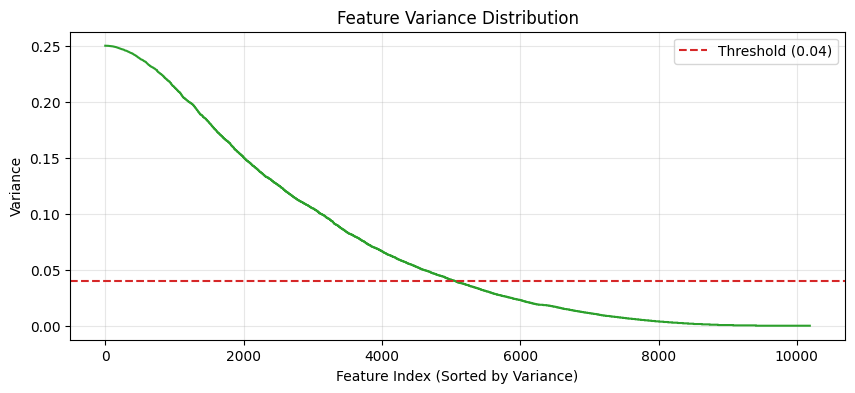

In [4]:
# Compute variance for KO terms  
X_terms = processor.preprocess_terms(ko_terms)  
variances = X_terms.var(axis=0).sort_values(ascending=False)  

# Plot variance across features  
plt.figure(figsize=(10, 4))  
plt.plot(range(len(variances)), variances.values, linestyle='-', color='#2ca02c')  
plt.axhline(y=0.04, color='#d62728', linestyle='--', label='Threshold (0.04)')  
plt.title('Feature Variance Distribution', fontsize=12)  
plt.xlabel('Feature Index (Sorted by Variance)', fontsize=10)  
plt.ylabel('Variance', fontsize=10)  
plt.legend()  
plt.grid(alpha=0.3)  
plt.show()  

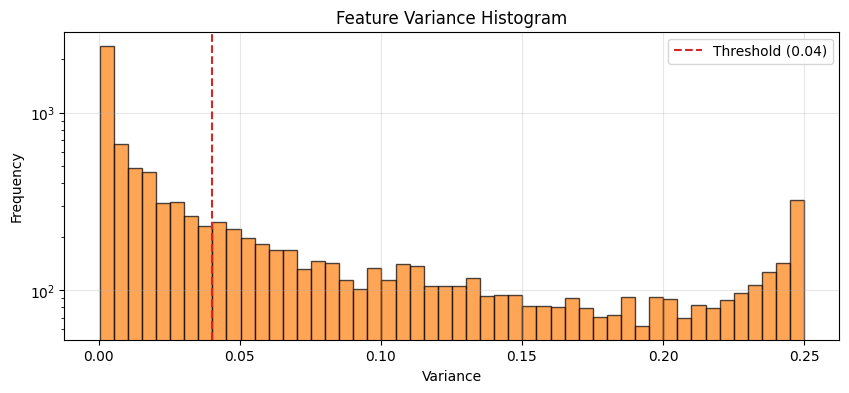

In [5]:
# Histogram of feature variances  
plt.figure(figsize=(10, 4))  
plt.hist(variances, bins=50, color='#ff7f0e', edgecolor='black', alpha=0.7)  
plt.axvline(x=0.04, color='#d62728', linestyle='--', label='Threshold (0.04)')  
plt.title('Feature Variance Histogram', fontsize=12)  
plt.xlabel('Variance', fontsize=10)  
plt.ylabel('Frequency', fontsize=10)  
plt.yscale('log')  # Log scale for skewed distributions  
plt.legend()  
plt.grid(alpha=0.3)  
plt.show()  

Data loaded successfully:
   key        ID                      speciesStrain  \
0    1  592010.0   Abiotrophia defectiva ATCC 49176   
1    1     219.0     Abiotrophia defectiva DSM 9849   
2    2  159837.0       Abyssibacter profundi OUC007   
3    3       NaN  Acanthopleuribacter pedis FYK2218   
4    4  258515.0   Acetanaerobacterium elongatum Z7   

                 speciesStrainComp                genus            genusComp  \
0    abiotrophiadefectivaatcc49176          Abiotrophia          abiotrophia   
1      abiotrophiadefectivadsm9849          Abiotrophia          abiotrophia   
2       abyssibacterprofundiouc007         Abyssibacter         abyssibacter   
3  acanthopleuribacterpedisfyk2218  Acanthopleuribacter  acanthopleuribacter   
4   acetanaerobacteriumelongatumz7  Acetanaerobacterium  acetanaerobacterium   

                         species                   speciesComp      strain  \
0          Abiotrophia defectiva          abiotrophiadefectiva  ATCC 49176   
1     

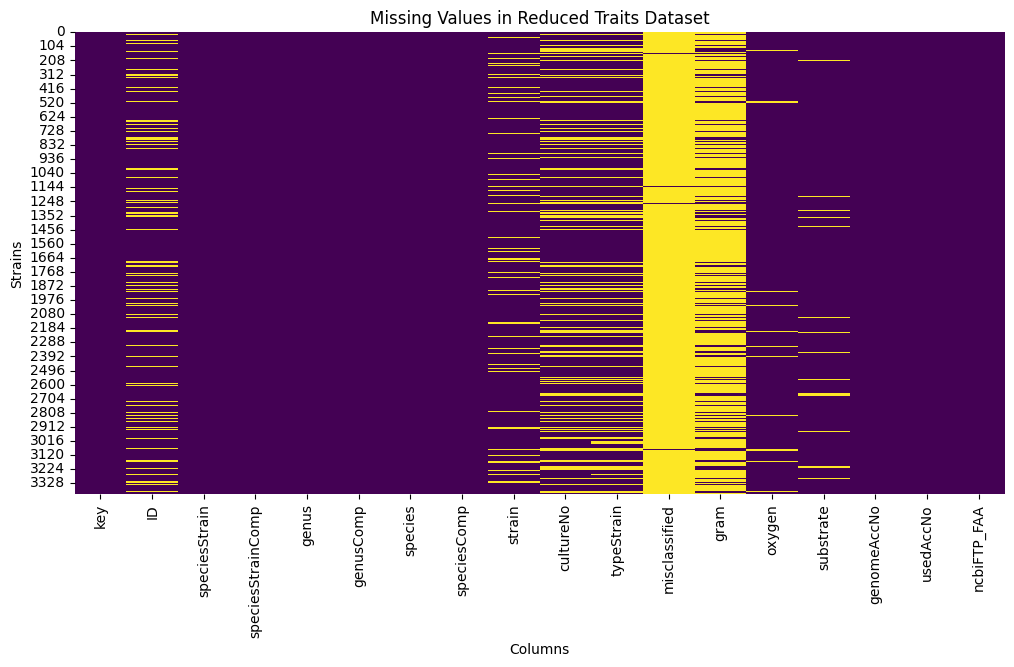

In [6]:
# Load reduced traits data  
reduced_traits = processor.load_reduced_traits_data()  

# Plot missing data  
plt.figure(figsize=(12, 6))  
sns.heatmap(reduced_traits.isnull(), cbar=False, cmap='viridis')  
plt.title('Missing Values in Reduced Traits Dataset')  
plt.xlabel('Columns')  
plt.ylabel('Strains')  
plt.show()  